<a href="https://colab.research.google.com/github/Ghanashri-m/CMPE255/blob/prashanth-branch/02_imputation_visualization_analysis_encoding_fadd_avprashanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the necessary libraries

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Load the dataset

In [121]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Creating a copy of the dataframe to avoid indices conflicts in future
copy_train = train_data.copy()
copy_test = test_data.copy()
test_dataset = copy_test

In [122]:
copy_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [123]:
copy_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [124]:
sample_submission= pd.read_csv("sample_submission.csv")

In [125]:
sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


This means that we have to keep the id. Because it will be included in the finals submission and the target variable is the **Salesprice**.

In [126]:
housing_dataset  = pd.concat([copy_train, copy_test], axis=0,sort=False)
housing_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


<AxesSubplot:>

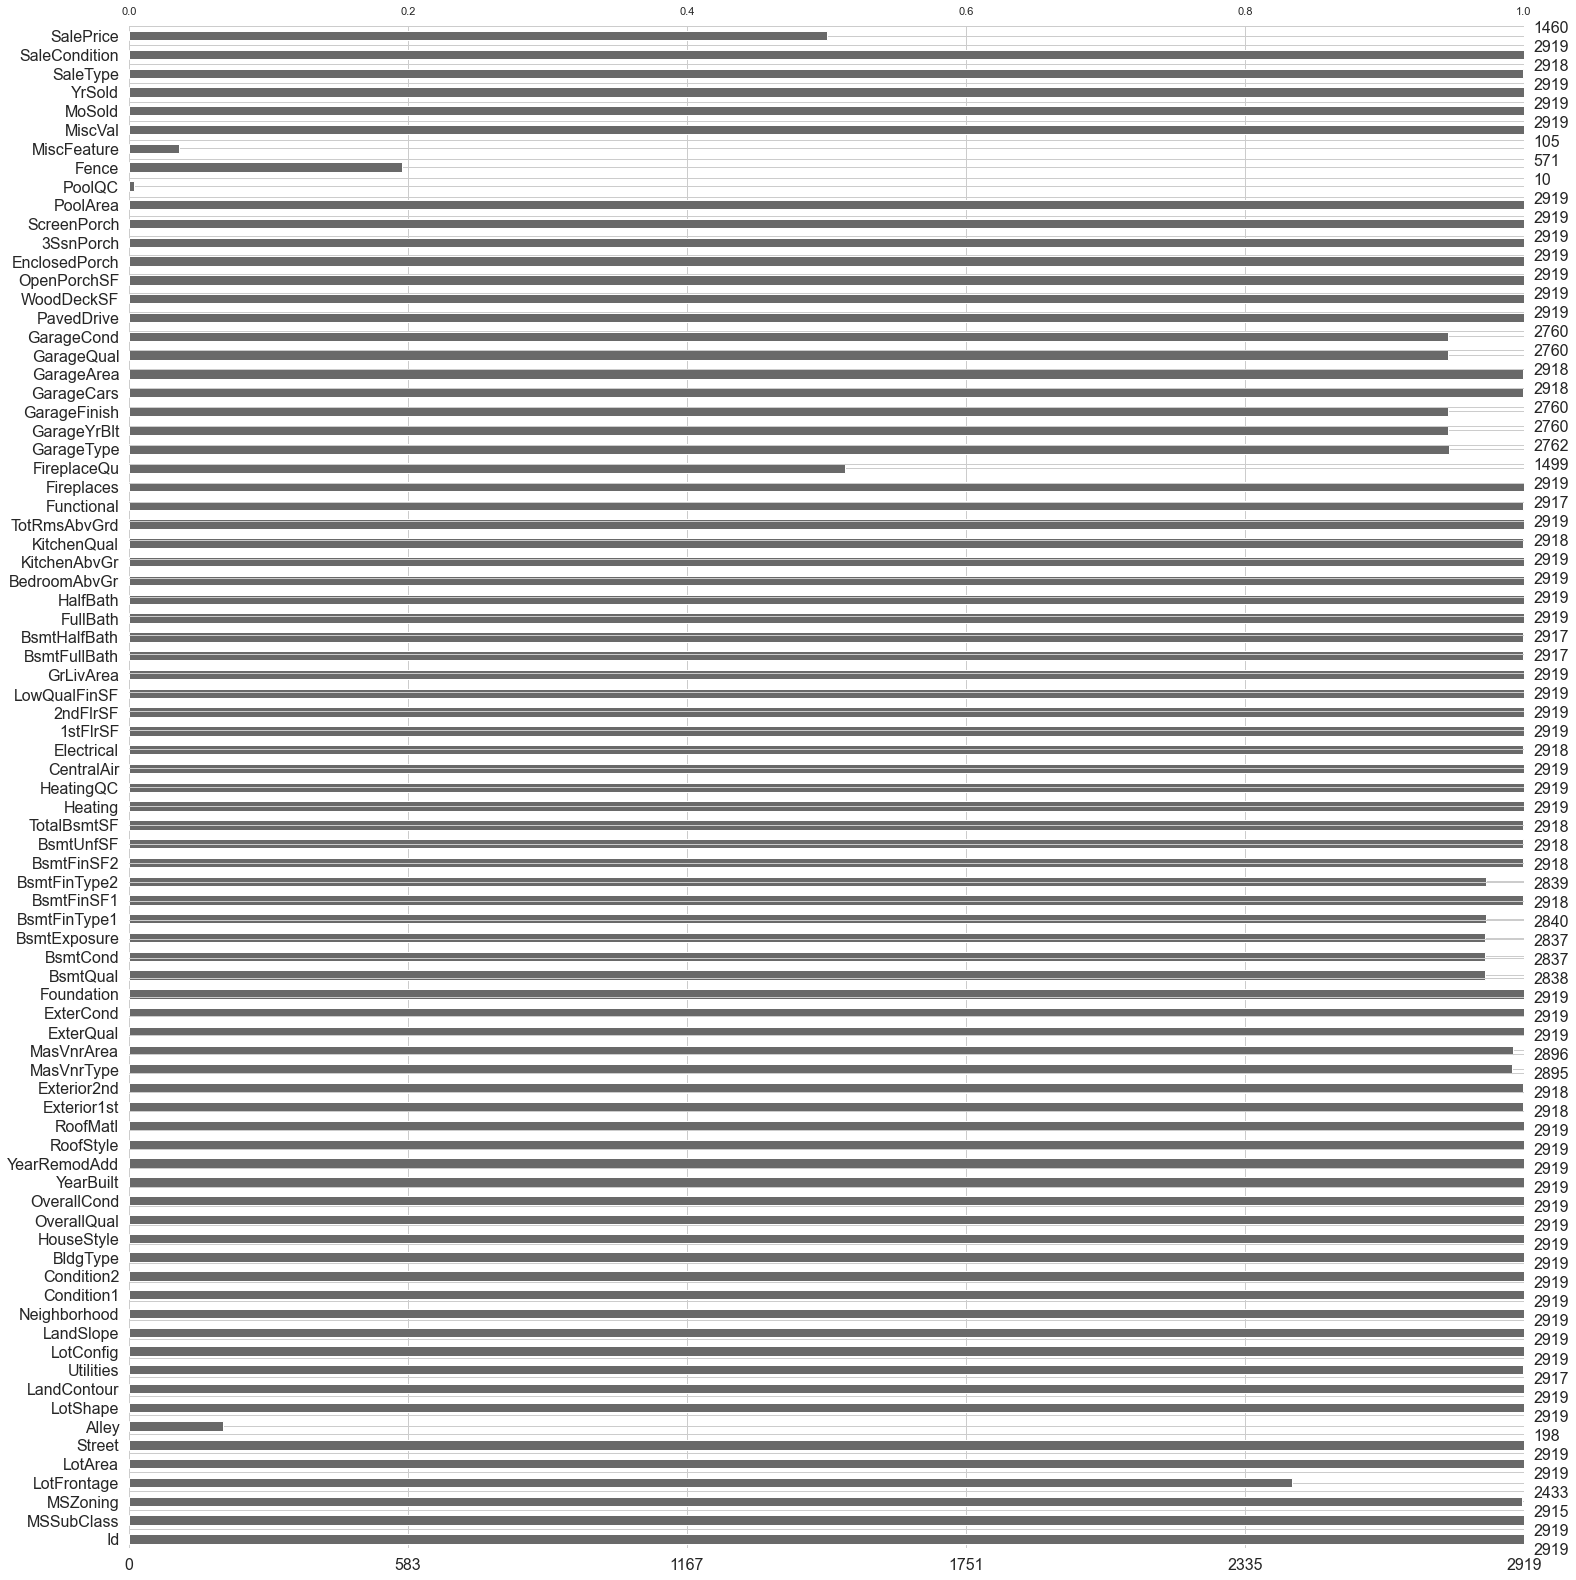

In [127]:
msno.bar(housing_dataset)

The above plot gives us an estimation on the number of null values in each column

<AxesSubplot:>

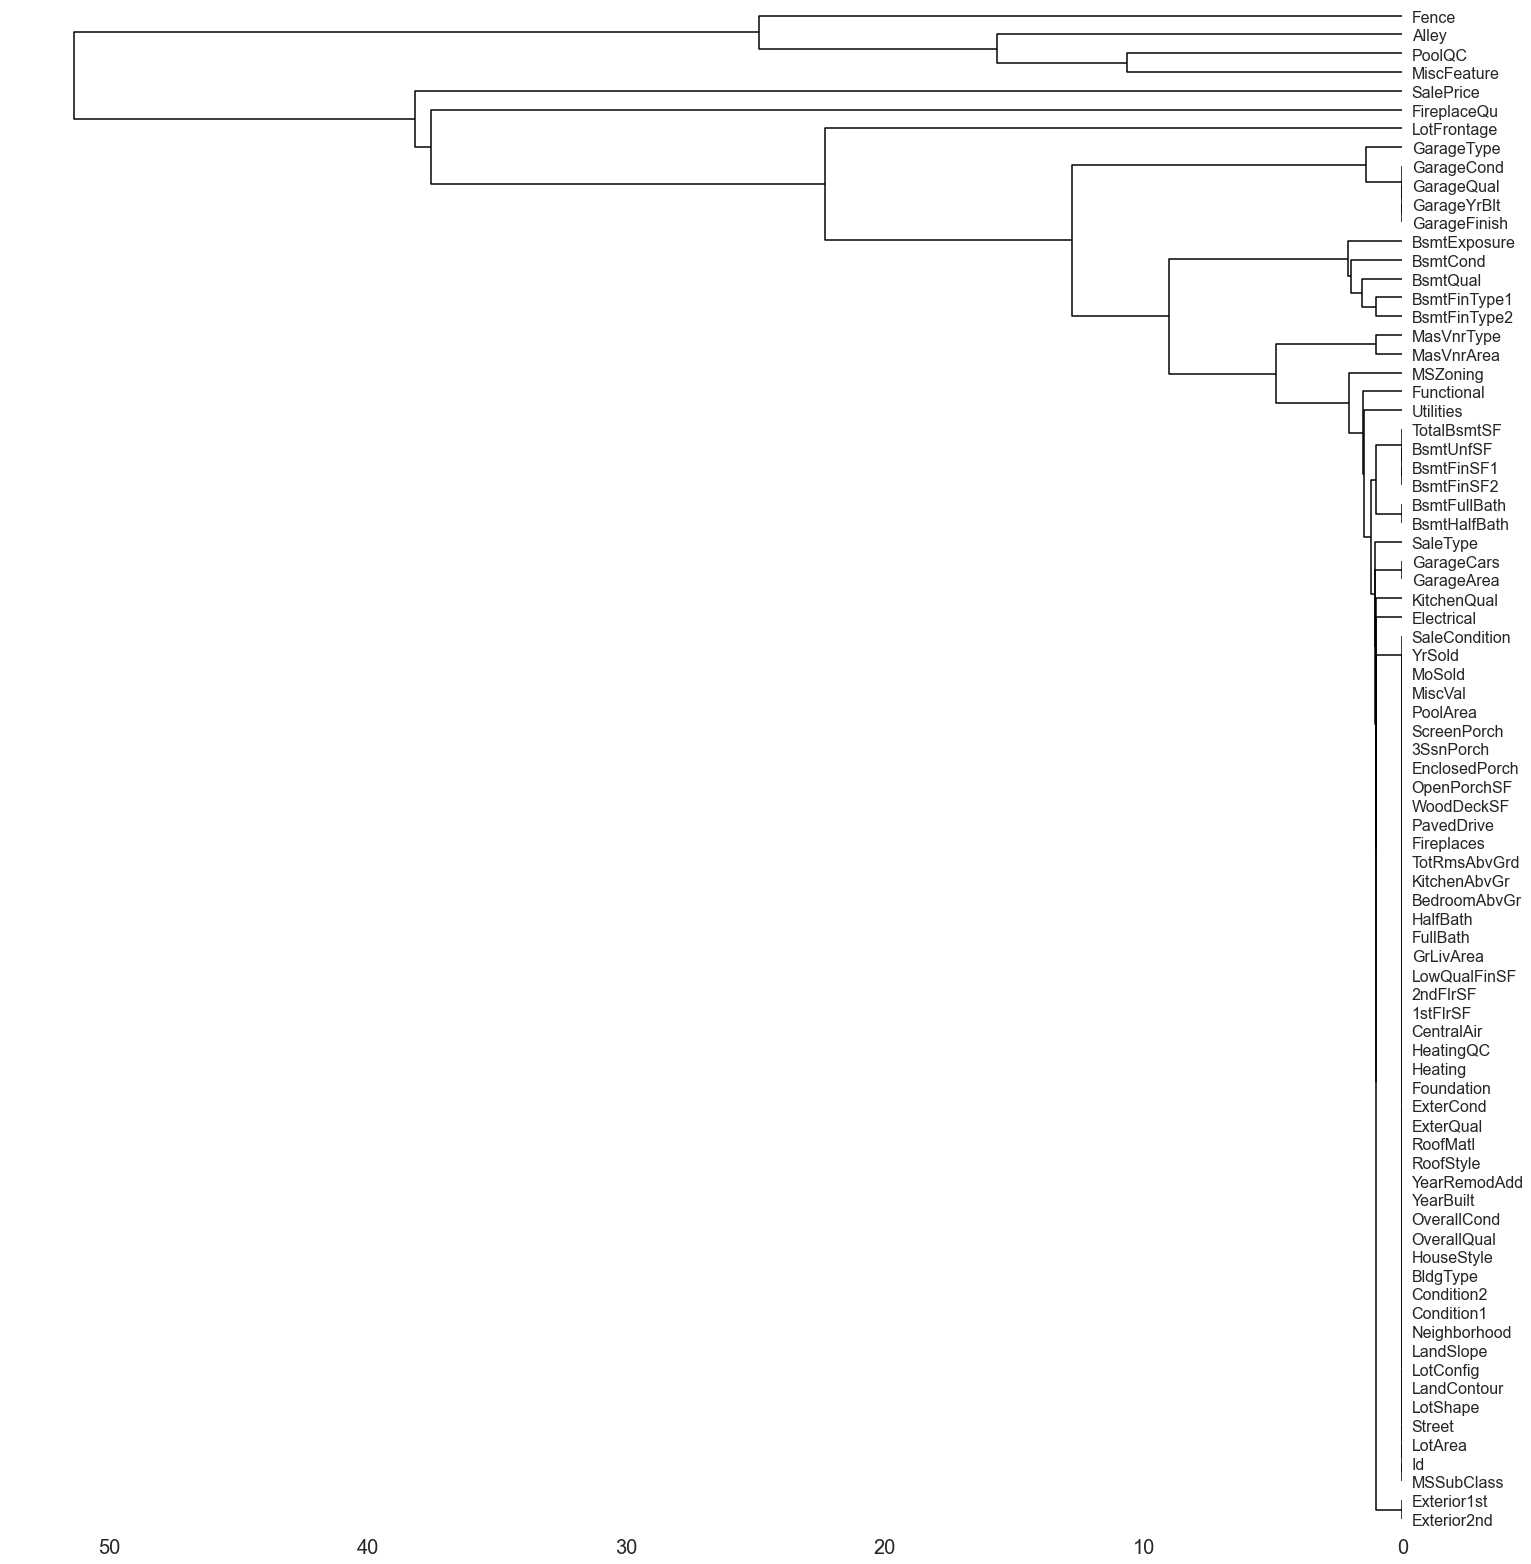

In [128]:
msno.dendrogram(housing_dataset)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

# Clean Data



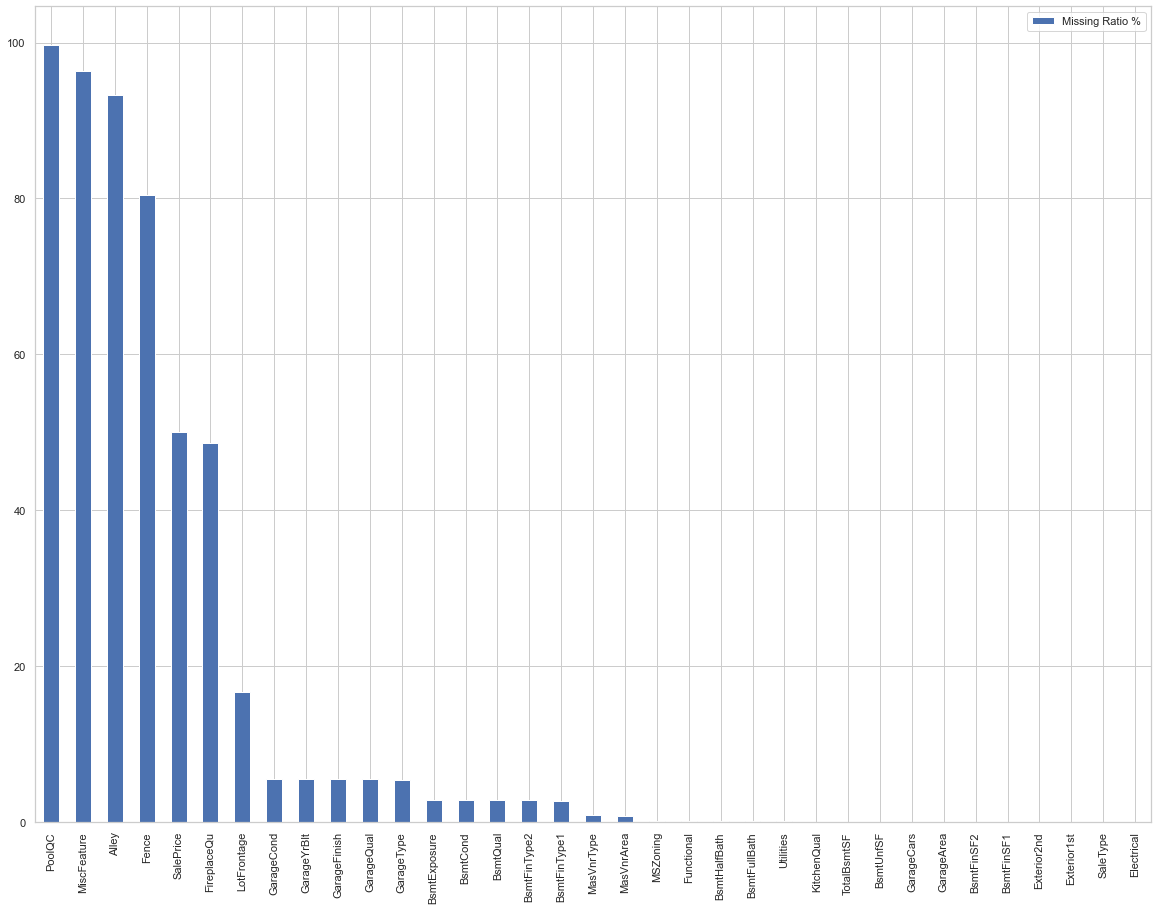

In [129]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        plot_width, plot_height = (20,15)
        plt.rcParams['figure.figsize'] = (plot_width,plot_height)
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NANs found')
plot_nas(housing_dataset)

Percentage of missing values

In [130]:
NAN = [(col, housing_dataset[col].isna().mean()*100) for col in housing_dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [131]:
NAN = NAN[NAN.percentage > 80]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [132]:
housing_dataset.shape

(2919, 81)

In [133]:
#From above we can identify that the columns PoolQC, MiscFeature, Alley and Fence contain significant amount of null values and we can get rid of these colums
housing_dataset = housing_dataset.drop(axis = 1, columns="PoolQC")
housing_dataset = housing_dataset.drop(axis = 1, columns="MiscFeature")
housing_dataset = housing_dataset.drop(axis = 1, columns="Alley")
housing_dataset = housing_dataset.drop(axis = 1, columns="Fence")

In [134]:
housing_dataset.shape

(2919, 77)

Reduced shape of the dataframe after removing the columns which has more than 80 percent of null values

## Identifying the outliers by comparing the features "LotArea" & "GrLivArea" with SalePrice.

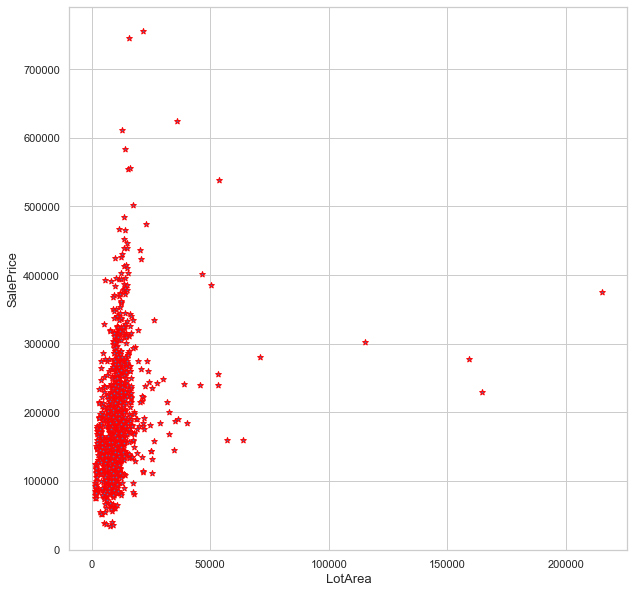

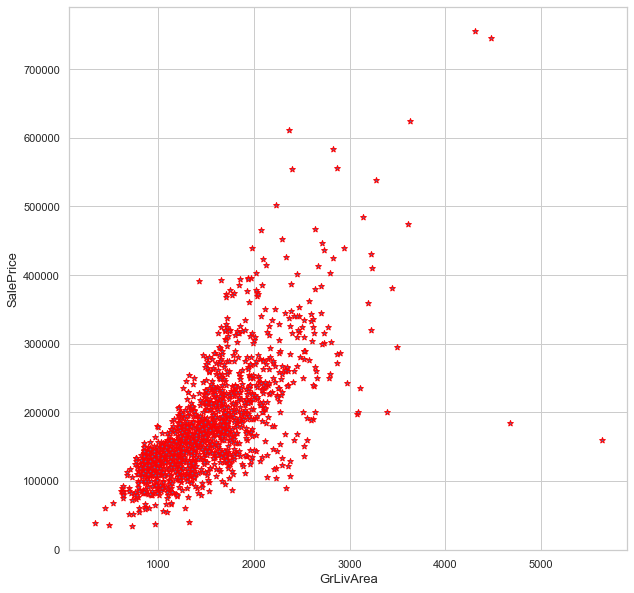

In [135]:
def outlier_visualization(feature):
    plt.figure(figsize=(10, 10))
    plt.scatter(x = housing_dataset[feature], y = housing_dataset['SalePrice'], marker = "*", edgecolors = "Red")
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature, fontsize=13)
    plt.show()

outlier_visualization('LotArea')
outlier_visualization('GrLivArea')

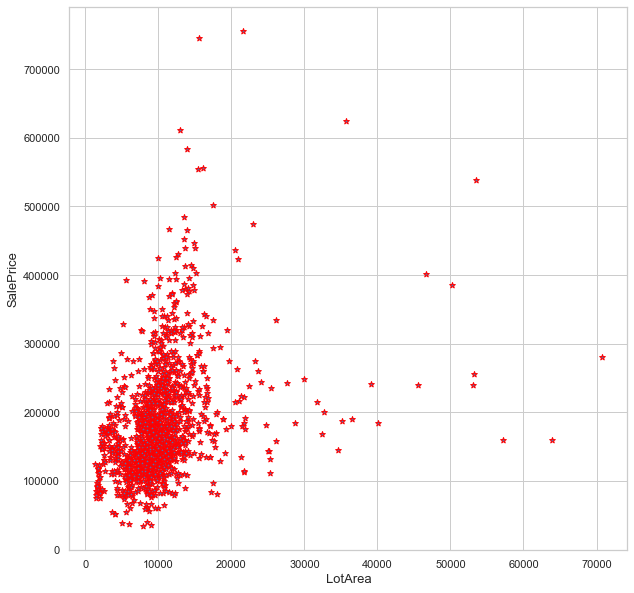

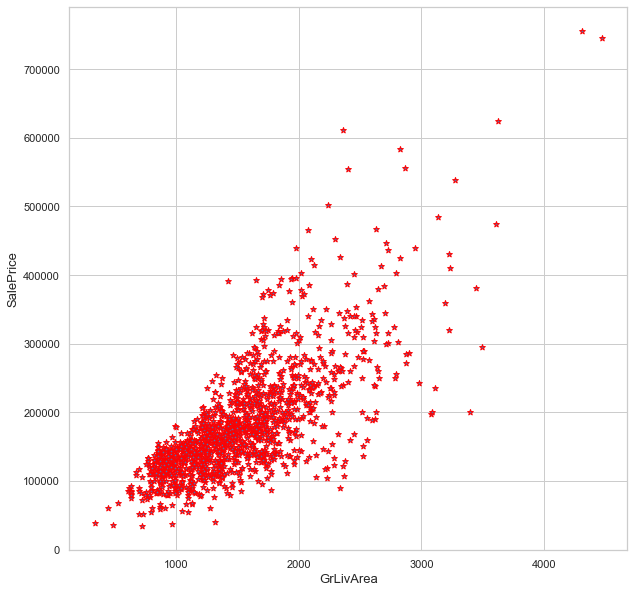

In [136]:

housing_dataset = housing_dataset.drop(housing_dataset[(housing_dataset['LotArea']>100000) & (housing_dataset['SalePrice']<400000)].index)

outlier_visualization('LotArea')

housing_dataset = housing_dataset.drop(housing_dataset[(housing_dataset['GrLivArea']>4000) & (housing_dataset['SalePrice']<300000)].index)
outlier_visualization('GrLivArea')

# Splitting into numerical and categorical data


In [137]:
object_columns = housing_dataset.select_dtypes(include=['object'])
numeric_columns =housing_dataset.select_dtypes(exclude=['object'])

Splitting the dataframe into the columns which has numerical and categorical features into object_columns and numeric_columns respectively.

In [138]:
len(object_columns.columns)

39

In [139]:
len(numeric_columns.columns)

38

In total it can be seen that there are in total 39 and 38 columns which are categorical and numeric respectively.

In [140]:
object_columns.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [141]:
numeric_columns.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [142]:
null_categorical_counts = object_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1418
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


## Imputing Missing Values

In [143]:
print(f"Unique values in MSZoning columns: {housing_dataset['MSZoning'].unique()}, Total unique value count:{len(housing_dataset['MSZoning'].unique())} ")
print(f"Unique values in Utilities columns: {housing_dataset['Utilities'].unique()}, Total unique value count:{len(housing_dataset['Utilities'].unique())} ")
print(f"Unique values in Exterior1st columns: {housing_dataset['Exterior1st'].unique()}, Total unique value count:{len(housing_dataset['Exterior1st'].unique())} ")
print(f"Unique values in Exterior2nd columns: {housing_dataset['Exterior2nd'].unique()}, Total unique value count:{len(housing_dataset['Exterior2nd'].unique())} ")
print(f"Unique values in KitchenQual columns: {housing_dataset['KitchenQual'].unique()}, Total unique value count:{len(housing_dataset['KitchenQual'].unique())} ")
print(f"Unique values in Functional columns: {housing_dataset['Functional'].unique()}, Total unique value count:{len(housing_dataset['Functional'].unique())} ")
print(f"Unique values in SaleType columns: {housing_dataset['SaleType'].unique()}, Total unique value count:{len(housing_dataset['SaleType'].unique())} ")
print(f"Unique values in MasVnrType columns: {housing_dataset['MasVnrType'].unique()}, Total unique value count:{len(housing_dataset['MasVnrType'].unique())} ")
print(f"Unique values in BsmtQual columns: {housing_dataset['BsmtQual'].unique()}, Total unique value count:{len(housing_dataset['BsmtQual'].unique())} ")
print(f"Unique values in BsmtCond columns: {housing_dataset['BsmtCond'].unique()}, Total unique value count:{len(housing_dataset['BsmtCond'].unique())} ")
print(f"Unique values in BsmtExposure columns: {housing_dataset['BsmtExposure'].unique()}, Total unique value count:{len(housing_dataset['BsmtExposure'].unique())} ")
print(f"Unique values in BsmtFinType1 columns: {housing_dataset['BsmtFinType1'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinType1'].unique())} ")
print(f"Unique values in BsmtFinType2 columns: {housing_dataset['BsmtFinType2'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinType2'].unique())} ")
print(f"Unique values in GarageType columns: {housing_dataset['GarageType'].unique()}, Total unique value count:{len(housing_dataset['GarageType'].unique())} ")
print(f"Unique values in GarageFinish columns: {housing_dataset['GarageFinish'].unique()}, Total unique value count:{len(housing_dataset['GarageFinish'].unique())} ")
print(f"Unique values in GarageQual columns: {housing_dataset['GarageQual'].unique()}, Total unique value count:{len(housing_dataset['GarageQual'].unique())} ")
print(f"Unique values in GarageCond columns: {housing_dataset['GarageCond'].unique()}, Total unique value count:{len(housing_dataset['GarageCond'].unique())} ")
print(f"Unique values in Electrical columns: {housing_dataset['Electrical'].unique()}, Total unique value count:{len(housing_dataset['Electrical'].unique())} ")
print(f"Unique values in FireplaceQu columns: {housing_dataset['FireplaceQu'].unique()}, Total unique value count:{len(housing_dataset['FireplaceQu'].unique())} ")

Unique values in MSZoning columns: ['RL' 'RM' 'C (all)' 'FV' 'RH' nan], Total unique value count:6 
Unique values in Utilities columns: ['AllPub' 'NoSeWa' nan], Total unique value count:3 
Unique values in Exterior1st columns: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan], Total unique value count:16 
Unique values in Exterior2nd columns: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' nan], Total unique value count:17 
Unique values in KitchenQual columns: ['Gd' 'TA' 'Ex' 'Fa' nan], Total unique value count:5 
Unique values in Functional columns: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan], Total unique value count:8 
Unique values in SaleType columns: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth' nan], Total unique value count:10 
Unique values in M

In [144]:
none_categorical_columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns[none_categorical_columns] = object_columns[none_categorical_columns].fillna('None')

/Users/aksharanarayana/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [145]:
fewmiss_categorical_columns = ['MasVnrType', 'Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','SaleType', 'KitchenQual','Functional']
object_columns[fewmiss_categorical_columns] = object_columns[fewmiss_categorical_columns].fillna(object_columns.mode().iloc[0])

In [146]:
null_categorical_counts = object_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [147]:
count_unique = object_columns.nunique()
unique_val = pd.DataFrame(count_unique, columns=["Unique_vals"])

In [148]:
unique_val

,Unique_vals
MSZoning,5
Street,2
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9
Condition2,8


In [149]:
unique_df = pd.read_csv("unique_vals.csv")
unique_df.head(10)

,index,Unique_vals
0,MSZoning,5
1,LotShape,4
2,LandContour,4
3,LotConfig,5
4,LandSlope,3
5,Neighborhood,25
6,Condition1,9
7,BldgType,5
8,HouseStyle,8
9,RoofStyle,6


[Text(0, 0, 'MSZoning'),
 Text(1, 0, 'LotShape'),
 Text(2, 0, 'LandContour'),
 Text(3, 0, 'LotConfig'),
 Text(4, 0, 'LandSlope'),
 Text(5, 0, 'Neighborhood'),
 Text(6, 0, 'Condition1'),
 Text(7, 0, 'BldgType'),
 Text(8, 0, 'HouseStyle'),
 Text(9, 0, 'RoofStyle'),
 Text(10, 0, 'Exterior1st'),
 Text(11, 0, 'Exterior2nd'),
 Text(12, 0, 'MasVnrType'),
 Text(13, 0, 'ExterQual'),
 Text(14, 0, 'ExterCond'),
 Text(15, 0, 'Foundation'),
 Text(16, 0, 'BsmtQual'),
 Text(17, 0, 'BsmtCond'),
 Text(18, 0, 'BsmtExposure'),
 Text(19, 0, 'BsmtFinType1'),
 Text(20, 0, 'BsmtFinType2'),
 Text(21, 0, 'HeatingQC'),
 Text(22, 0, 'CentralAir'),
 Text(23, 0, 'Electrical'),
 Text(24, 0, 'KitchenQual'),
 Text(25, 0, 'Functional'),
 Text(26, 0, 'FireplaceQu'),
 Text(27, 0, 'GarageType'),
 Text(28, 0, 'GarageFinish'),
 Text(29, 0, 'GarageQual'),
 Text(30, 0, 'GarageCond'),
 Text(31, 0, 'PavedDrive'),
 Text(32, 0, 'SaleType'),
 Text(33, 0, 'SaleCondition'),
 Text(34, 0, 'MasVnrArea'),
 Text(35, 0, 'BsmtFinSF1'),
 T

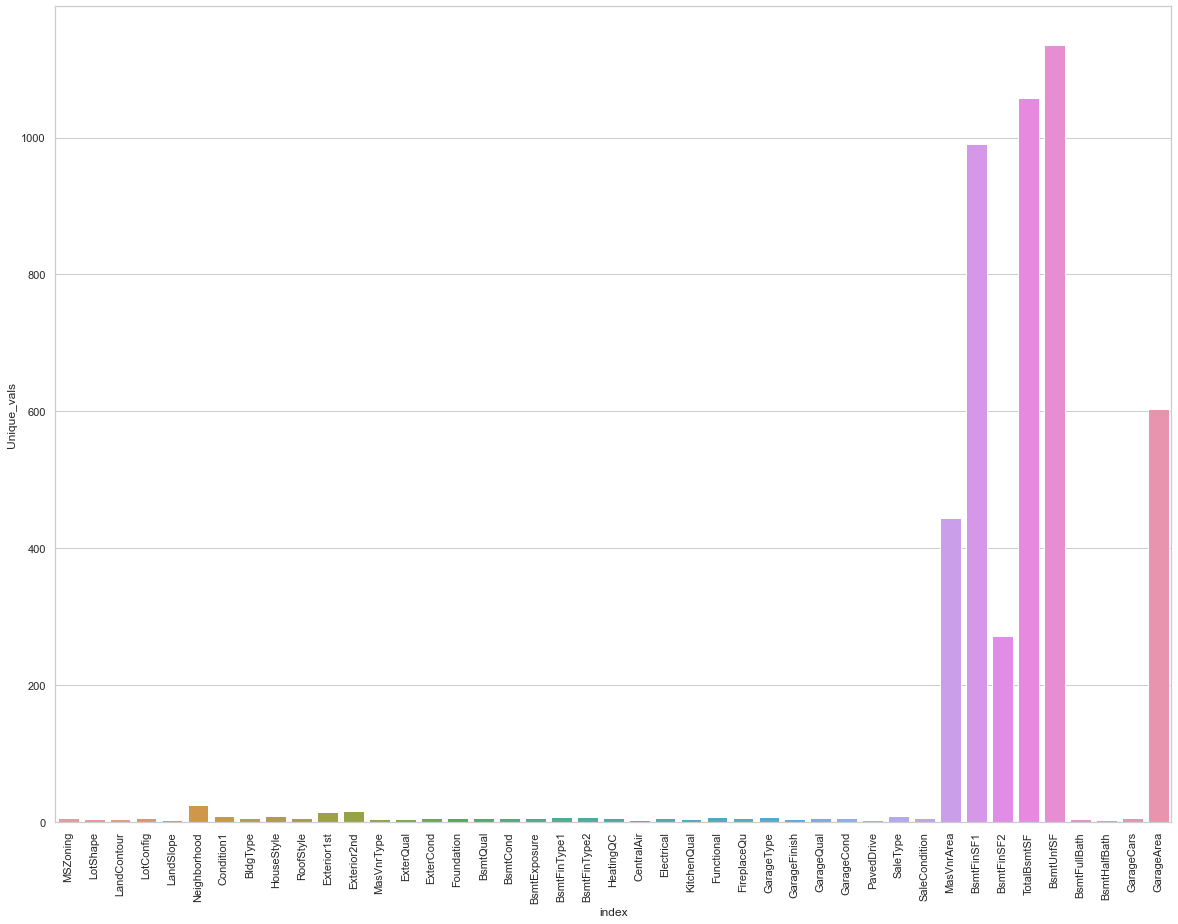

In [150]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="Unique_vals",data=unique_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [151]:
unique_df = unique_df.loc[unique_df['Unique_vals']<=9]
unique_df

,index,Unique_vals
0,MSZoning,5
1,LotShape,4
2,LandContour,4
3,LotConfig,5
4,LandSlope,3
6,Condition1,9
7,BldgType,5
8,HouseStyle,8
9,RoofStyle,6
12,MasVnrType,4


[Text(0, 0, 'MSZoning'),
 Text(1, 0, 'LotShape'),
 Text(2, 0, 'LandContour'),
 Text(3, 0, 'LotConfig'),
 Text(4, 0, 'LandSlope'),
 Text(5, 0, 'Condition1'),
 Text(6, 0, 'BldgType'),
 Text(7, 0, 'HouseStyle'),
 Text(8, 0, 'RoofStyle'),
 Text(9, 0, 'MasVnrType'),
 Text(10, 0, 'ExterQual'),
 Text(11, 0, 'ExterCond'),
 Text(12, 0, 'Foundation'),
 Text(13, 0, 'BsmtQual'),
 Text(14, 0, 'BsmtCond'),
 Text(15, 0, 'BsmtExposure'),
 Text(16, 0, 'BsmtFinType1'),
 Text(17, 0, 'BsmtFinType2'),
 Text(18, 0, 'HeatingQC'),
 Text(19, 0, 'CentralAir'),
 Text(20, 0, 'Electrical'),
 Text(21, 0, 'KitchenQual'),
 Text(22, 0, 'Functional'),
 Text(23, 0, 'FireplaceQu'),
 Text(24, 0, 'GarageType'),
 Text(25, 0, 'GarageFinish'),
 Text(26, 0, 'GarageQual'),
 Text(27, 0, 'GarageCond'),
 Text(28, 0, 'PavedDrive'),
 Text(29, 0, 'SaleType'),
 Text(30, 0, 'SaleCondition'),
 Text(31, 0, 'BsmtFullBath'),
 Text(32, 0, 'BsmtHalfBath'),
 Text(33, 0, 'GarageCars')]

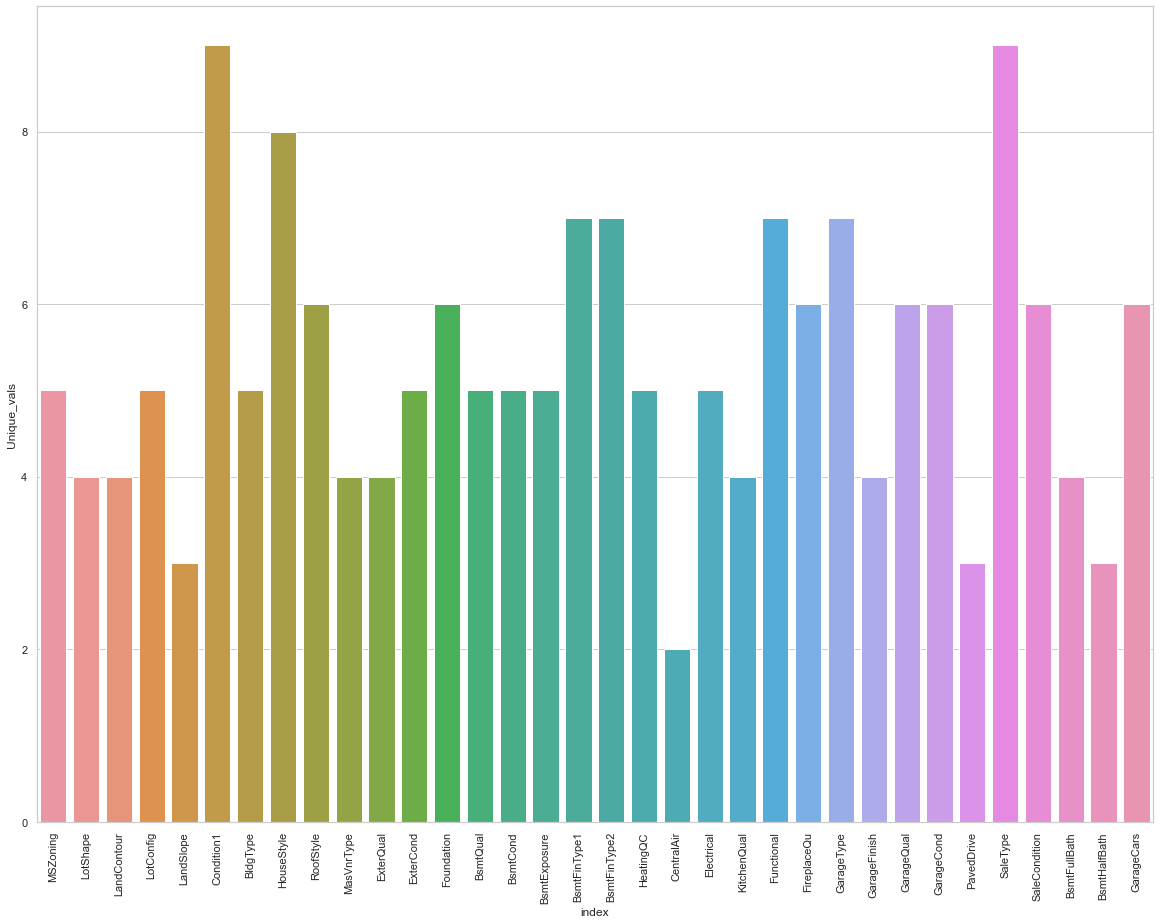

In [152]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="Unique_vals",data=unique_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [153]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

Null values in each column:
Id                  0
MSSubClass          0
LotFrontage       482
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1453
dtype: int64


LotFrontage: Linear feet of street connected to property

In [154]:
print(f"Unique values in MasVnrArea columns: {housing_dataset['MasVnrArea'].unique()}, Total unique value count:{len(housing_dataset['MasVnrArea'].unique())} ")
print(f"Unique values in BsmtFinSF1 columns: {housing_dataset['BsmtFinSF1'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinSF1'].unique())} ")
print(f"Unique values in BsmtFinSF2 columns: {housing_dataset['BsmtFinSF2'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinSF2'].unique())} ")
print(f"Unique values in TotalBsmtSF columns: {housing_dataset['TotalBsmtSF'].unique()}, Total unique value count:{len(housing_dataset['TotalBsmtSF'].unique())} ")
print(f"Unique values in BsmtFullBath columns: {housing_dataset['BsmtFullBath'].unique()}, Total unique value count:{len(housing_dataset['BsmtFullBath'].unique())} ")
print(f"Unique values in BsmtHalfBath columns: {housing_dataset['BsmtHalfBath'].unique()}, Total unique value count:{len(housing_dataset['BsmtHalfBath'].unique())} ")
print(f"Unique values in GarageCars columns: {housing_dataset['GarageCars'].unique()}, Total unique value count:{len(housing_dataset['GarageCars'].unique())} ")
print(f"Unique values in GarageArea columns: {housing_dataset['GarageArea'].unique()}, Total unique value count:{len(housing_dataset['GarageArea'].unique())} ")

Unique values in MasVnrArea columns: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.810e+02 1.080e+02

In [155]:
numeric_columns['GarageCars'] = numeric_columns['GarageCars'].fillna(0)

/var/folders/91/yzn0mx0d2g1gx8ykmhf4qwkm0000gn/T/ipykernel_46674/4073540186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['GarageCars'] = numeric_columns['GarageCars'].fillna(0)


In [156]:
print(numeric_columns["LotFrontage"].mean())

69.15505154639175


In [157]:
numeric_columns['LotFrontage'] = numeric_columns['LotFrontage'].fillna(numeric_columns["LotFrontage"].mean())

/var/folders/91/yzn0mx0d2g1gx8ykmhf4qwkm0000gn/T/ipykernel_46674/679129766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['LotFrontage'] = numeric_columns['LotFrontage'].fillna(numeric_columns["LotFrontage"].mean())


In [158]:
print(numeric_columns['GarageYrBlt'])

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 2907, dtype: float64


In [159]:
print((numeric_columns["YrSold"]-numeric_columns["YearBuilt"]).median())

35.0


In [160]:
numeric_columns['GarageYrBlt'] = numeric_columns['GarageYrBlt'].fillna(numeric_columns['YrSold']-35)

/var/folders/91/yzn0mx0d2g1gx8ykmhf4qwkm0000gn/T/ipykernel_46674/1601760740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['GarageYrBlt'] = numeric_columns['GarageYrBlt'].fillna(numeric_columns['YrSold']-35)


In [161]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

Null values in each column:
Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1453
dtype: int64


In [162]:
fewmiss_numeric_columns = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
object_columns[fewmiss_numeric_columns] = numeric_columns[fewmiss_numeric_columns].fillna(numeric_columns.mode().iloc[0])

/Users/aksharanarayana/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [163]:
object_columns.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageCars', 'GarageArea'],
      dtype='object')

# Column-wise Variance Plotting

RL         2258
RM          460
FV          138
RH           26
C (all)      25
Name: MSZoning, dtype: int64

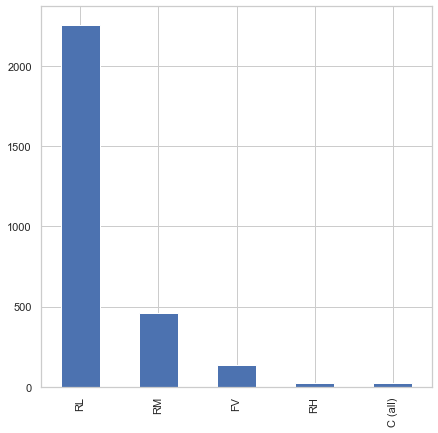

In [164]:
object_columns['MSZoning'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['MSZoning'].value_counts() 

Pave    2896
Grvl      11
Name: Street, dtype: int64

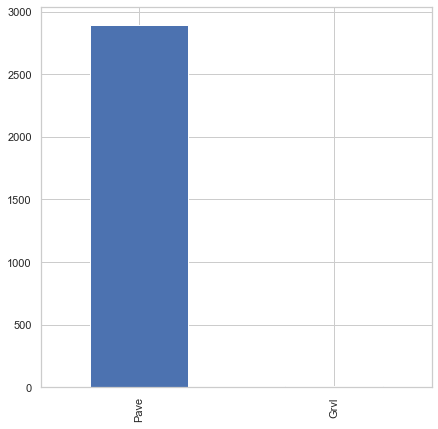

In [165]:
object_columns['Street'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Street'].value_counts() 

Reg    1855
IR1     964
IR2      74
IR3      14
Name: LotShape, dtype: int64

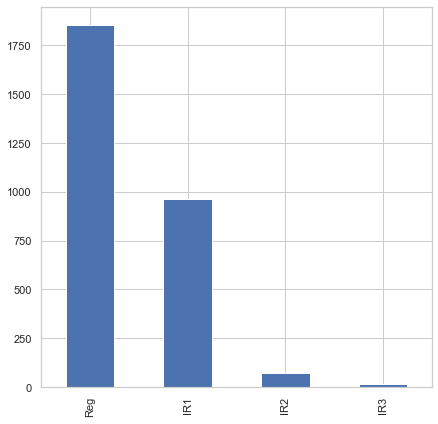

In [166]:
object_columns['LotShape'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LotShape'].value_counts() 

Lvl    2617
HLS     118
Bnk     115
Low      57
Name: LandContour, dtype: int64

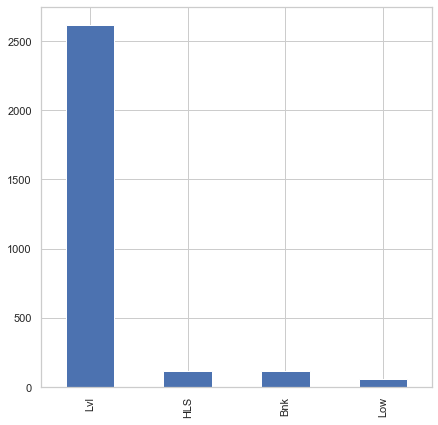

In [167]:
object_columns['LandContour'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LandContour'].value_counts() 

AllPub    2906
NoSeWa       1
Name: Utilities, dtype: int64

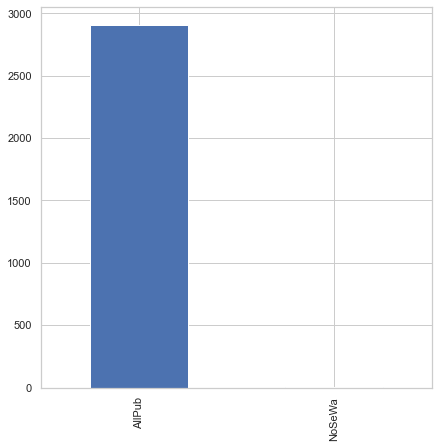

In [168]:
object_columns['Utilities'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Utilities'].value_counts() 

Inside     2125
Corner      509
CulDSac     174
FR2          85
FR3          14
Name: LotConfig, dtype: int64

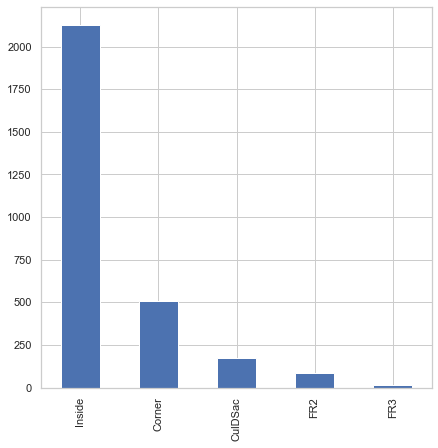

In [169]:
object_columns['LotConfig'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LotConfig'].value_counts() 

Gtl    2771
Mod     124
Sev      12
Name: LandSlope, dtype: int64

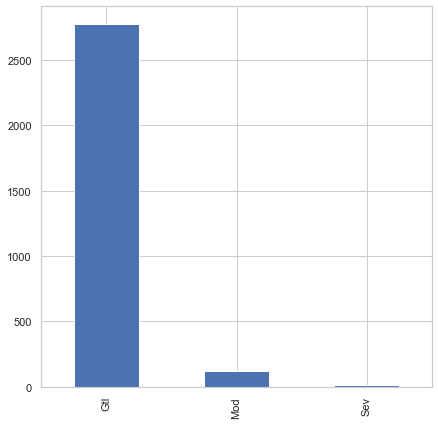

In [170]:
object_columns['LandSlope'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['LandSlope'].value_counts() 

NAmes      441
CollgCr    266
OldTown    238
Edwards    192
Somerst    181
Gilbert    165
NridgHt    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      70
StoneBr     51
SWISU       48
ClearCr     42
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

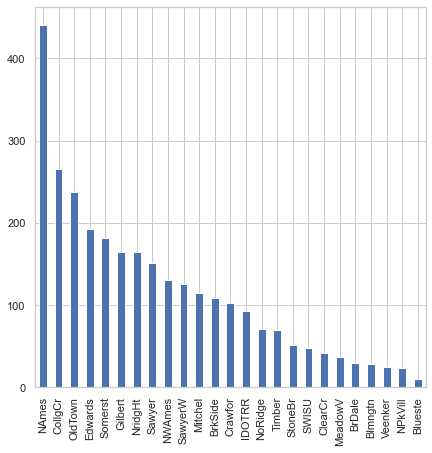

In [171]:
object_columns['Neighborhood'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Neighborhood'].value_counts() 

Norm      2501
Feedr      163
Artery      92
RRAn        50
PosN        38
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

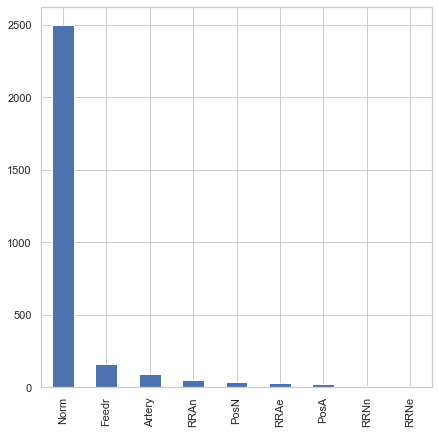

In [172]:
object_columns['Condition1'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Condition1'].value_counts() 

Norm      2878
Feedr       13
Artery       5
PosA         4
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

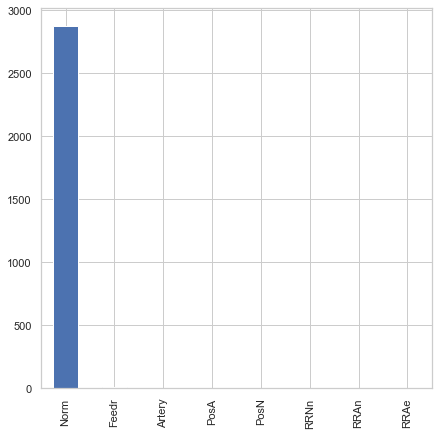

In [173]:
object_columns['Condition2'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Condition2'].value_counts() 

1Fam      2416
TwnhsE     227
Duplex     108
Twnhs       95
2fmCon      61
Name: BldgType, dtype: int64

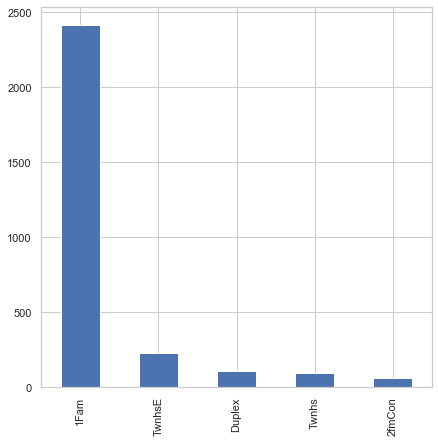

In [174]:
object_columns['BldgType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BldgType'].value_counts() 

1Story    1465
2Story     868
1.5Fin     312
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

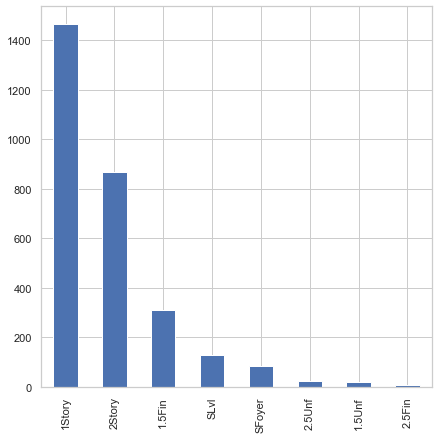

In [175]:
object_columns['HouseStyle'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['HouseStyle'].value_counts() 

Gable      2303
Hip         547
Gambrel      22
Flat         19
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

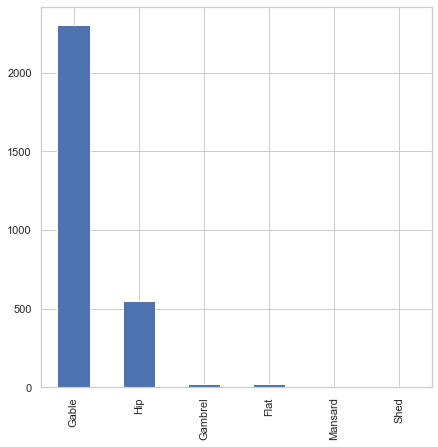

In [176]:
object_columns['RoofStyle'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['RoofStyle'].value_counts() 

CompShg    2866
Tar&Grv      22
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

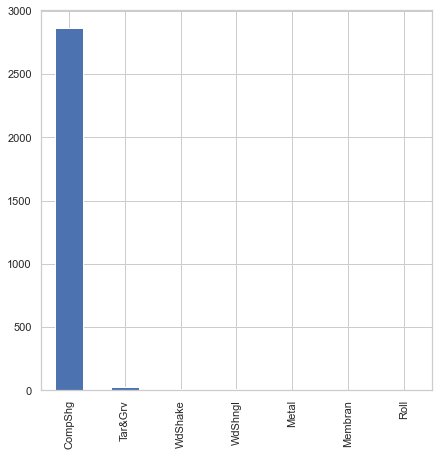

In [177]:
object_columns['RoofMatl'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['RoofMatl'].value_counts() 

VinylSd    1023
MetalSd     449
HdBoard     442
Wd Sdng     408
Plywood     219
CemntBd     125
BrkFace      86
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

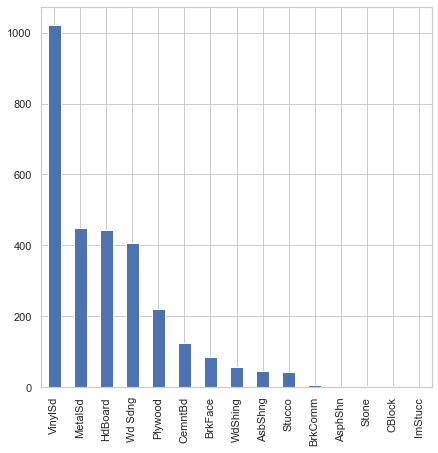

In [178]:
object_columns['Exterior1st'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Exterior1st'].value_counts() 

VinylSd    1013
MetalSd     446
HdBoard     405
Wd Sdng     389
Plywood     268
CmentBd     125
Wd Shng      80
BrkFace      46
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

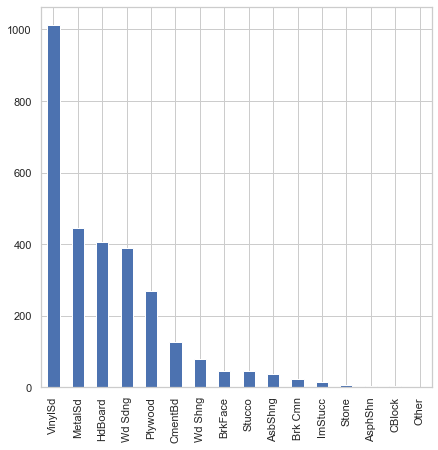

In [179]:
object_columns['Exterior2nd'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Exterior2nd'].value_counts() 

None       1763
BrkFace     876
Stone       244
BrkCmn       24
Name: MasVnrType, dtype: int64

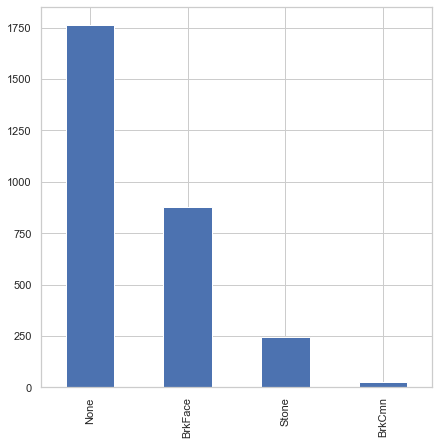

In [180]:
object_columns['MasVnrType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['MasVnrType'].value_counts() 

TA    1791
Gd     976
Ex     105
Fa      35
Name: ExterQual, dtype: int64

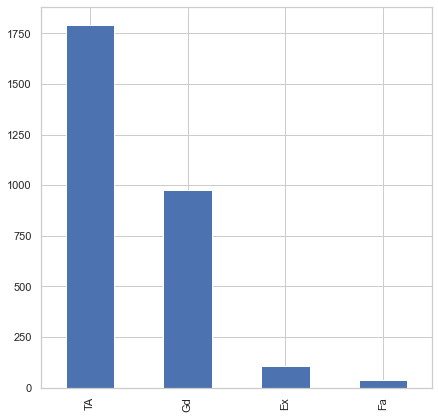

In [181]:
object_columns['ExterQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['ExterQual'].value_counts() 

TA    2527
Gd     299
Fa      67
Ex      11
Po       3
Name: ExterCond, dtype: int64

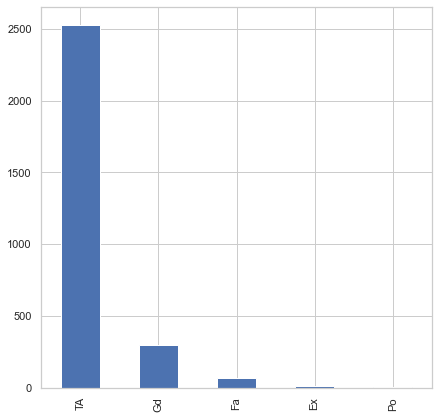

In [182]:
object_columns['ExterCond'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['ExterCond'].value_counts() 

PConc     1302
CBlock    1229
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

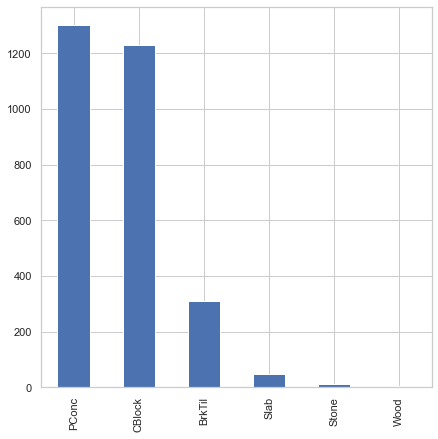

In [183]:
object_columns['Foundation'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Foundation'].value_counts() 

TA      1280
Gd      1202
Ex       256
Fa        88
None      81
Name: BsmtQual, dtype: int64

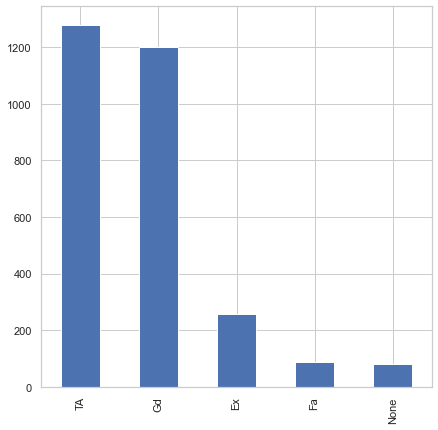

In [184]:
object_columns['BsmtQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtQual'].value_counts() 

TA      2594
Gd       122
Fa       104
None      82
Po         5
Name: BsmtCond, dtype: int64

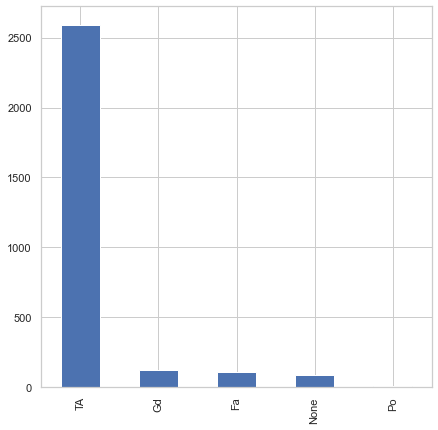

In [185]:
object_columns['BsmtCond'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtCond'].value_counts() 

No      1900
Av       418
Gd       268
Mn       239
None      82
Name: BsmtExposure, dtype: int64

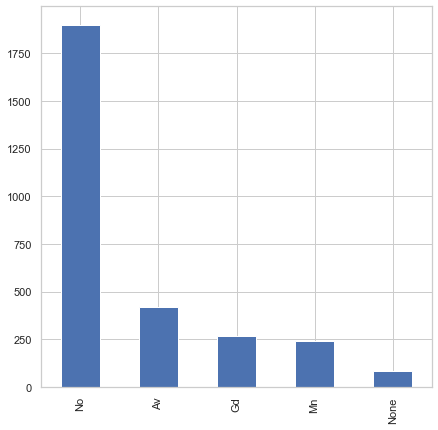

In [186]:
object_columns['BsmtExposure'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtExposure'].value_counts() 

Unf     848
GLQ     844
ALQ     427
Rec     286
BLQ     269
LwQ     154
None     79
Name: BsmtFinType1, dtype: int64

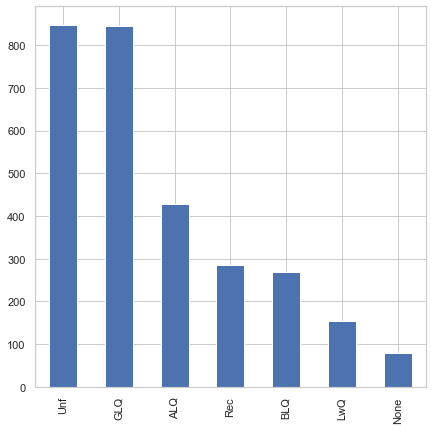

In [187]:
object_columns['BsmtFinType1'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtFinType1'].value_counts() 

GasA     2863
GasW       26
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

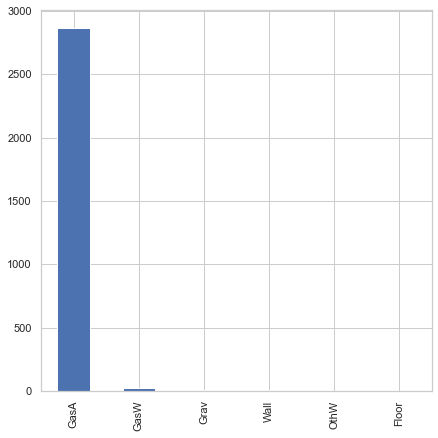

In [188]:
object_columns['Heating'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Heating'].value_counts() 

Ex    1485
TA     855
Gd     473
Fa      91
Po       3
Name: HeatingQC, dtype: int64

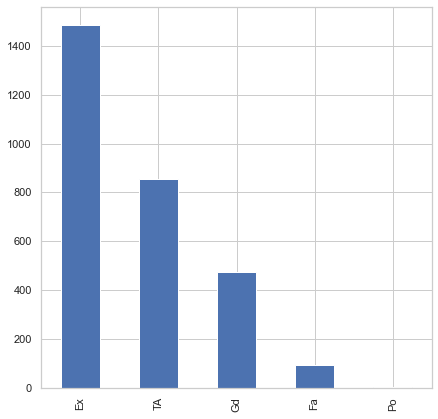

In [189]:
object_columns['HeatingQC'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['HeatingQC'].value_counts() 

Y    2711
N     196
Name: CentralAir, dtype: int64

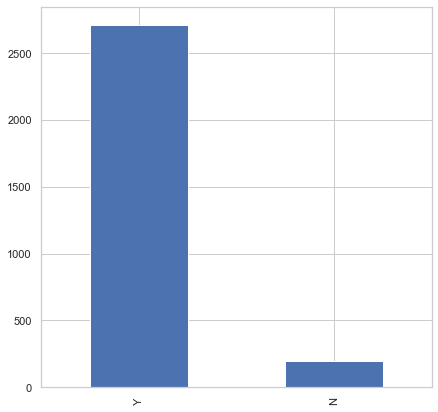

In [190]:
object_columns['CentralAir'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['CentralAir'].value_counts() 

SBrkr    2660
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

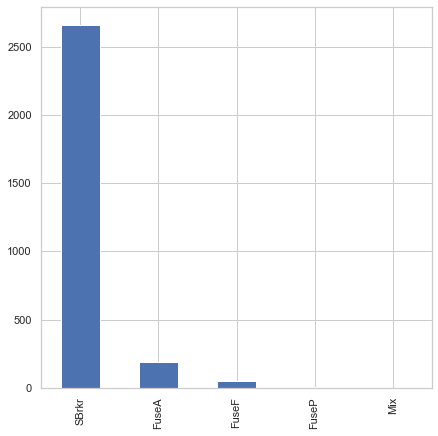

In [191]:
object_columns['Electrical'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Electrical'].value_counts() 

TA    1488
Gd    1146
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

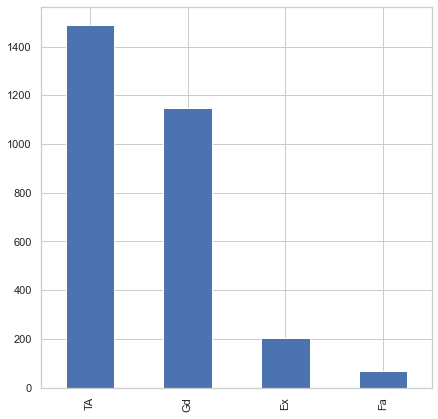

In [192]:
object_columns['KitchenQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['KitchenQual'].value_counts() 

Typ     2707
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

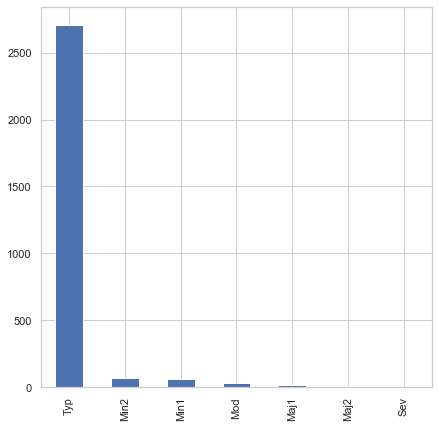

In [193]:
object_columns['Functional'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['Functional'].value_counts() 

None    1418
Gd       737
TA       589
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

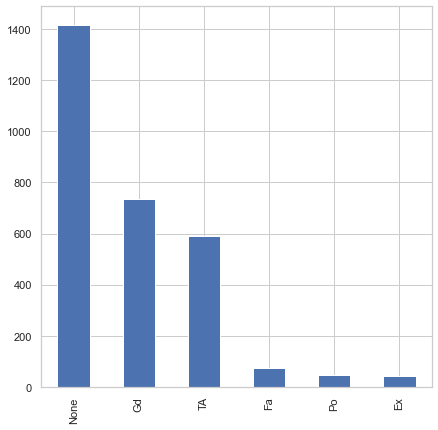

In [194]:
object_columns['FireplaceQu'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['FireplaceQu'].value_counts() 

Attchd     1716
Detchd      777
BuiltIn     184
None        157
Basment      35
2Types       23
CarPort      15
Name: GarageType, dtype: int64

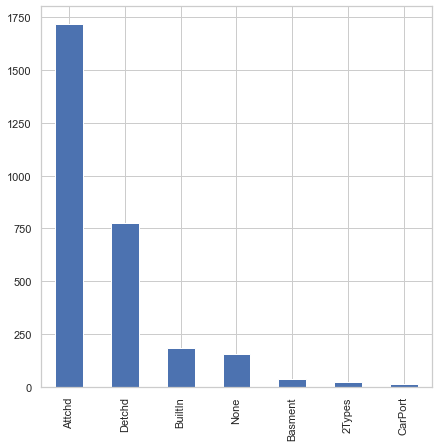

In [195]:
object_columns['GarageType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageType'].value_counts() 

Unf     1227
RFn      806
Fin      715
None     159
Name: GarageFinish, dtype: int64

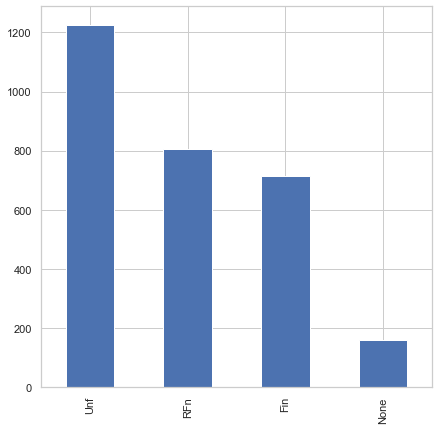

In [196]:
object_columns['GarageFinish'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageFinish'].value_counts() 

TA      2592
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

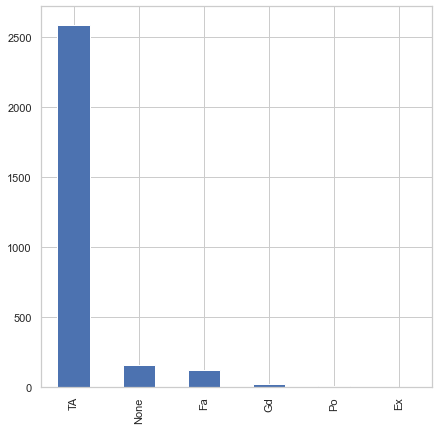

In [197]:
object_columns['GarageQual'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageQual'].value_counts() 

TA      2643
None     159
Fa        73
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64

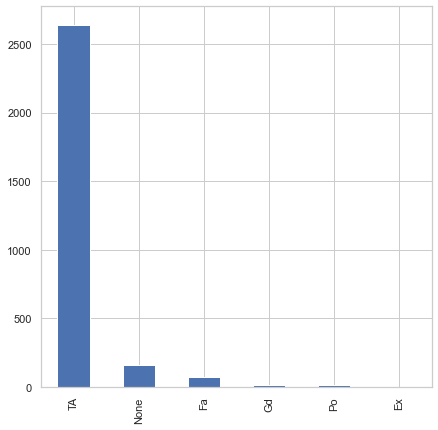

In [198]:
object_columns['GarageCond'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageCond'].value_counts() 

Y    2629
N     216
P      62
Name: PavedDrive, dtype: int64

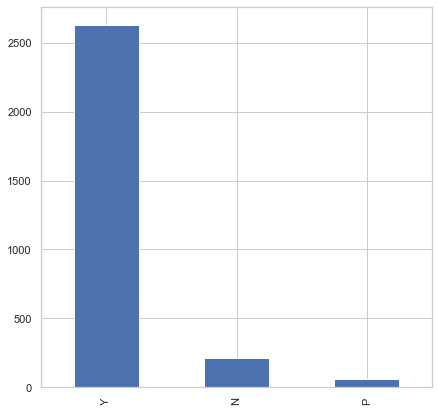

In [199]:
object_columns['PavedDrive'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['PavedDrive'].value_counts() 

WD       2516
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

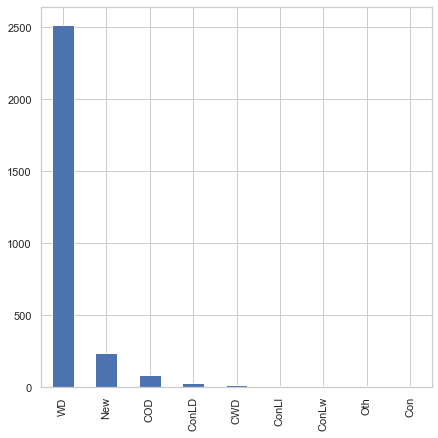

In [200]:
object_columns['SaleType'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['SaleType'].value_counts() 

Normal     2392
Partial     243
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

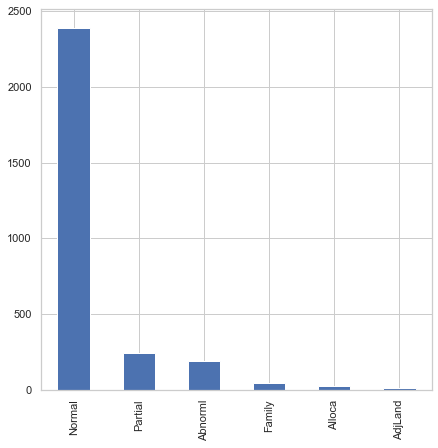

In [201]:
object_columns['SaleCondition'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['SaleCondition'].value_counts() 

0.0    1701
1.0    1169
2.0      35
3.0       2
Name: BsmtFullBath, dtype: int64

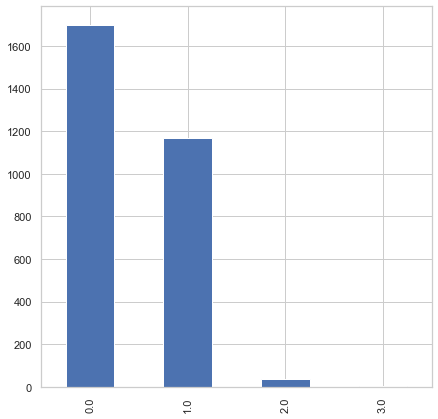

In [202]:
object_columns['BsmtFullBath'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtFullBath'].value_counts() 

0.0    2733
1.0     170
2.0       4
Name: BsmtHalfBath, dtype: int64

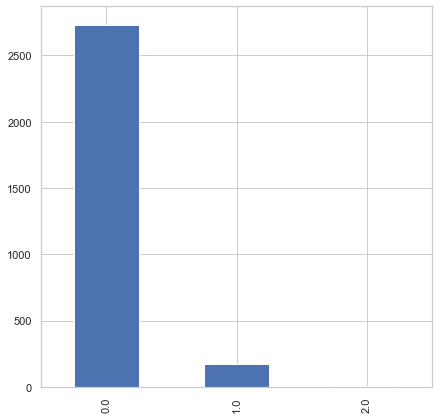

In [203]:
object_columns['BsmtHalfBath'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['BsmtHalfBath'].value_counts() 

2.0    1584
1.0     775
3.0     373
0.0     158
4.0      16
5.0       1
Name: GarageCars, dtype: int64

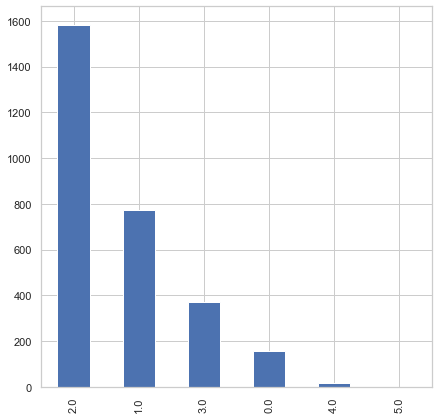

In [204]:
object_columns['GarageCars'].value_counts().plot(kind='bar',figsize=[7,7])
object_columns['GarageCars'].value_counts() 

After looking at the above variance for all the categorical columns. I have decided to remove RoofMatl,Condition2, Utilities, Street and Heating column becuase the distribution of data is very uneven in those columns.

In [205]:
object_columns = object_columns.drop(['Utilities','Condition2','Heating','Utilities','RoofMatl','Street'], axis=1)

# Feature Addition

In [206]:
numeric_columns["Age_of_house"] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']

/var/folders/91/yzn0mx0d2g1gx8ykmhf4qwkm0000gn/T/ipykernel_46674/488003079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns["Age_of_house"] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']


In [207]:
numeric_columns['Age_of_house'].describe()

count    2907.000000
mean       36.498452
std        30.347351
min        -1.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: Age_of_house, dtype: float64

Negative minimum value is identified for age of house, which is not appropriate. Hence we need to look where the negative value is found.

In [208]:
find_neg = numeric_columns[numeric_columns['Age_of_house'] < 0]

In [209]:
find_neg

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_house
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,484,0,0,0,0,17000,10,2007,NaN,-1


The remodelling date of the house is found to be 2009. So we will change the year sold date to 2009

In [210]:
numeric_columns.loc[numeric_columns['YrSold']< numeric_columns['YearBuilt'], 'YrSold'] = 2009
numeric_columns['Age_of_house'] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']
numeric_columns['Age_of_house'].describe()

/Users/aksharanarayana/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/91/yzn0mx0d2g1gx8ykmhf4qwkm0000gn/T/ipykernel_46674/2821885939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['Age_of_house'] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']


count    2907.000000
mean       36.499140
std        30.346523
min         0.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: Age_of_house, dtype: float64

### Combining the numeric and categorical dataframes
In the above functions, We have handled numeric and categorical features of our dataset separately. Now, we chose to combine these two data frames for further analysis.

In [211]:
combined_data = pd.concat([object_columns, numeric_columns], axis=1)
combined_data

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_house
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,61,0,0,0,0,0,2,2008,208500.0,5
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,0,0,0,0,0,0,5,2007,181500.0,31
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,42,0,0,0,0,0,9,2008,223500.0,7
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,35,272,0,0,0,0,2,2006,140000.0,91
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,84,0,0,0,0,0,12,2008,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,0,0,0,0,0,0,6,2006,NaN,36
1455,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,24,0,0,0,0,0,4,2006,NaN,36
1456,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,0,0,0,0,0,0,9,2006,NaN,46
1457,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,...,32,0,0,0,0,700,7,2006,NaN,14


## Data Correleation

Correlation map to see how features are correlated with SalePrice

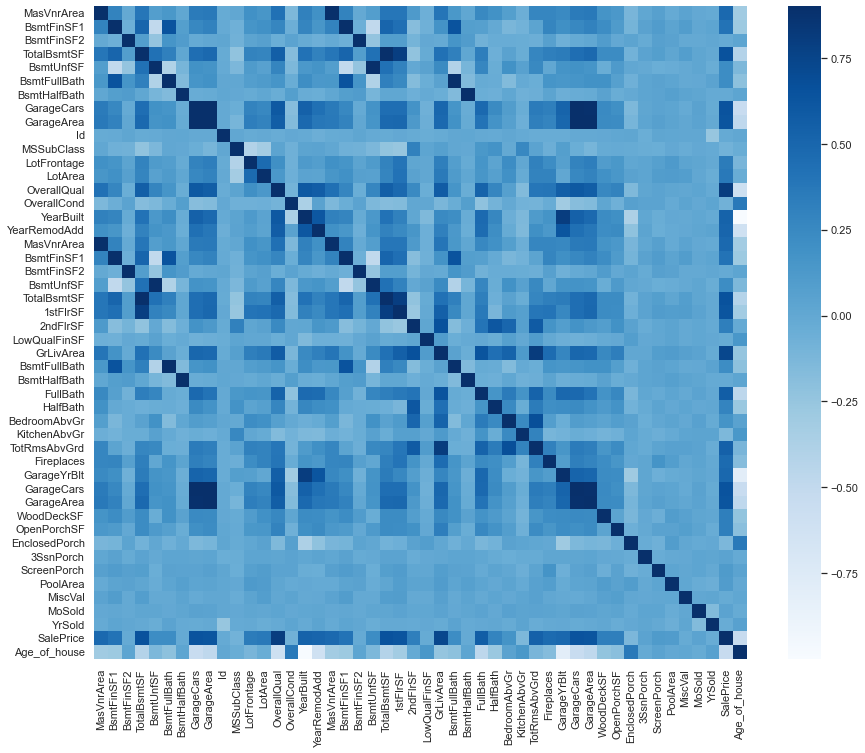

In [212]:
def correlation_matrix():
    corr_matrix = combined_data.corr()
    plt.subplots(figsize=(15,12))
    sns.color_palette("bright")
    sns.heatmap(corr_matrix, vmax=0.9, square=True, cmap="Blues")
correlation_matrix()

In [213]:
housing_dataset = housing_dataset.drop(['SalePrice'],axis=1)
housing_dataset = housing_dataset.set_index('Id') # Settting to id because it is required in the submission format
test_dataset = test_dataset.set_index('Id')

housing_dataset.shape

(2907, 75)

In [214]:
housing_dataset.iloc[:1,2]

Id
1    65.0
Name: LotFrontage, dtype: float64

In [215]:
transformed_dataset = pd.concat([object_columns, numeric_columns], axis=1,sort=False)

In [216]:
transformed_dataset

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_house
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,61,0,0,0,0,0,2,2008,208500.0,5
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,0,0,0,0,0,0,5,2007,181500.0,31
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,42,0,0,0,0,0,9,2008,223500.0,7
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,35,272,0,0,0,0,2,2006,140000.0,91
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,84,0,0,0,0,0,12,2008,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,0,0,0,0,0,0,6,2006,NaN,36
1455,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,24,0,0,0,0,0,4,2006,NaN,36
1456,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,0,0,0,0,0,0,9,2006,NaN,46
1457,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,...,32,0,0,0,0,700,7,2006,NaN,14


In [217]:
transformed_dataset.isna().sum()

MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SalePrice       1453
Age_of_house       0
Length: 82, dtype: int64

## Logarithmic Transformation

/Users/aksharanarayana/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



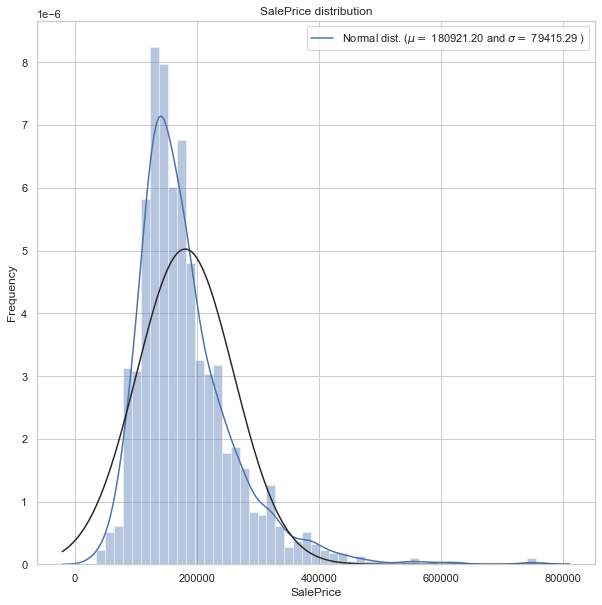

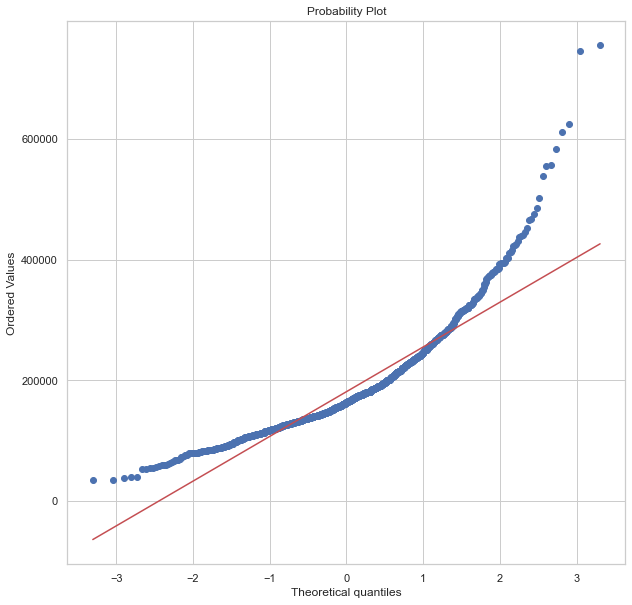

In [218]:
from scipy.stats import skew, norm, probplot
y = copy_train['SalePrice']
fig = plt.figure(figsize=(10,10))
sns.distplot(y , fit=norm);

(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot
fig = plt.figure(figsize=(10,10))
res = probplot(y, plot=plt)
plt.show()

# Plotting displot for the Saleprice

/Users/aksharanarayana/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



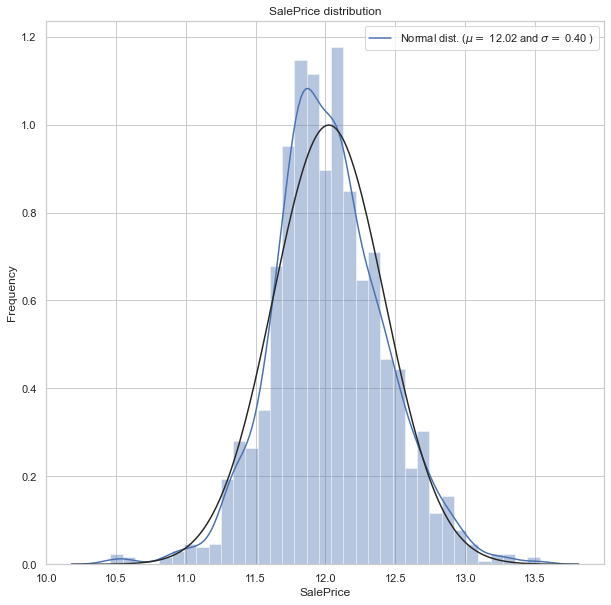

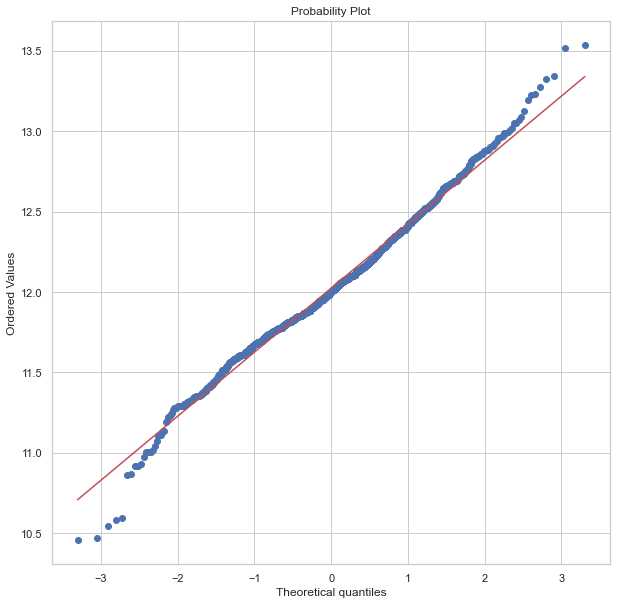

In [219]:
y = np.log( copy_train['SalePrice'])

fig = plt.figure(figsize=(10,10))
sns.distplot(y , fit=norm);
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = probplot(y, plot=plt)
plt.show()

## Transforming some numerical variables that are categorical

In [220]:
#MSSubClass=The building class
transformed_dataset['MSSubClass'] = transformed_dataset['MSSubClass'].apply(str)

#Changing 'OverallCond' into a categorical variable
transformed_dataset['OverallCond'] = transformed_dataset['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
transformed_dataset['YrSold'] = transformed_dataset['YrSold'].astype(str)
transformed_dataset['MoSold'] = transformed_dataset['MoSold'].astype(str)

In [221]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# Below we process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(transformed_dataset[c].values)) 
    transformed_dataset[c] = lbl.transform(list(transformed_dataset[c].values))
      
print('Shape all_data: {}'.format(transformed_dataset.shape))

Shape all_data: (2907, 82)


#Getting dummy categorical features

In [222]:
transformed_dataset = pd.get_dummies(transformed_dataset)
print(transformed_dataset.shape)

ntrain = housing_dataset.shape[0]
ntest = test_dataset.shape[0]
copy_train = transformed_dataset[:ntrain]
copy_test = transformed_dataset[ntrain:]

(2907, 201)
